In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import seaborn as sns

In [3]:
filmes = pd.read_csv("movies.csv")
filmes.columns = ['filme_id', 'titulo', 'generos']
filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
generos = filmes.generos.str.get_dummies()
generos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
dados = pd.concat([filmes, generos], axis=1)
dados.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
generos_escalados

/Users/luanandrade/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/luanandrade/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [11]:
generos_escalados.shape

(9742, 20)

In [13]:
modelo = KMeans(n_clusters=3)

modelo.fit(generos_escalados)

print("Grupos {}".format(modelo.labels_))

Grupos [1 1 0 ... 0 1 0]


In [16]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[ 0.01392822 -0.08598478 -0.1654883  -0.24664988 -0.27045122  0.02437935
   0.0665555   0.04874445  0.12389608 -0.11902409  0.01829743 -0.02011736
  -0.119362   -0.03022301  0.00655654  0.06717336 -0.33443476  0.00923967
   0.03513315  0.01642812]
 [-0.05917995 -0.09995158  0.91733232  2.16468567  2.7329589   0.28012221
  -0.3115088  -0.2008463  -0.60831962  0.89024149 -0.09492563 -0.28038468
   0.19082616  0.44473091 -0.12757264 -0.26832126 -0.11228711 -0.46797007
  -0.17827764 -0.07881136]
 [-0.05917995  0.77412343  0.51497596  0.06693705 -0.24233804 -0.44068991
  -0.25755771 -0.21261554 -0.4544768   0.16790924 -0.06264986  0.40690221
   0.7850725  -0.14948152  0.05974514 -0.3004314   2.76803416  0.33738258
 

In [19]:
grupos = pd.DataFrame(modelo.cluster_centers_,
                    columns=generos.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.013928,-0.085985,-0.165488,-0.246650,-0.270451,0.024379,0.066555,0.048744,0.123896,-0.119024,0.018297,-0.020117,-0.119362,-0.030223,0.006557,0.067173,-0.334435,0.009240,0.035133,0.016428
1,-0.059180,-0.099952,0.917332,2.164686,2.732959,0.280122,-0.311509,-0.200846,-0.608320,0.890241,-0.094926,-0.280385,0.190826,0.444731,-0.127573,-0.268321,-0.112287,-0.467970,-0.178278,-0.078811
2,-0.059180,0.774123,0.514976,0.066937,-0.242338,-0.440690,-0.257558,-0.212616,-0.454477,0.167909,-0.062650,0.406902,0.785072,-0.149482,0.059745,-0.300431,2.768034,0.337383,-0.123801,-0.061887


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a235325c0>,
      dtype=object)

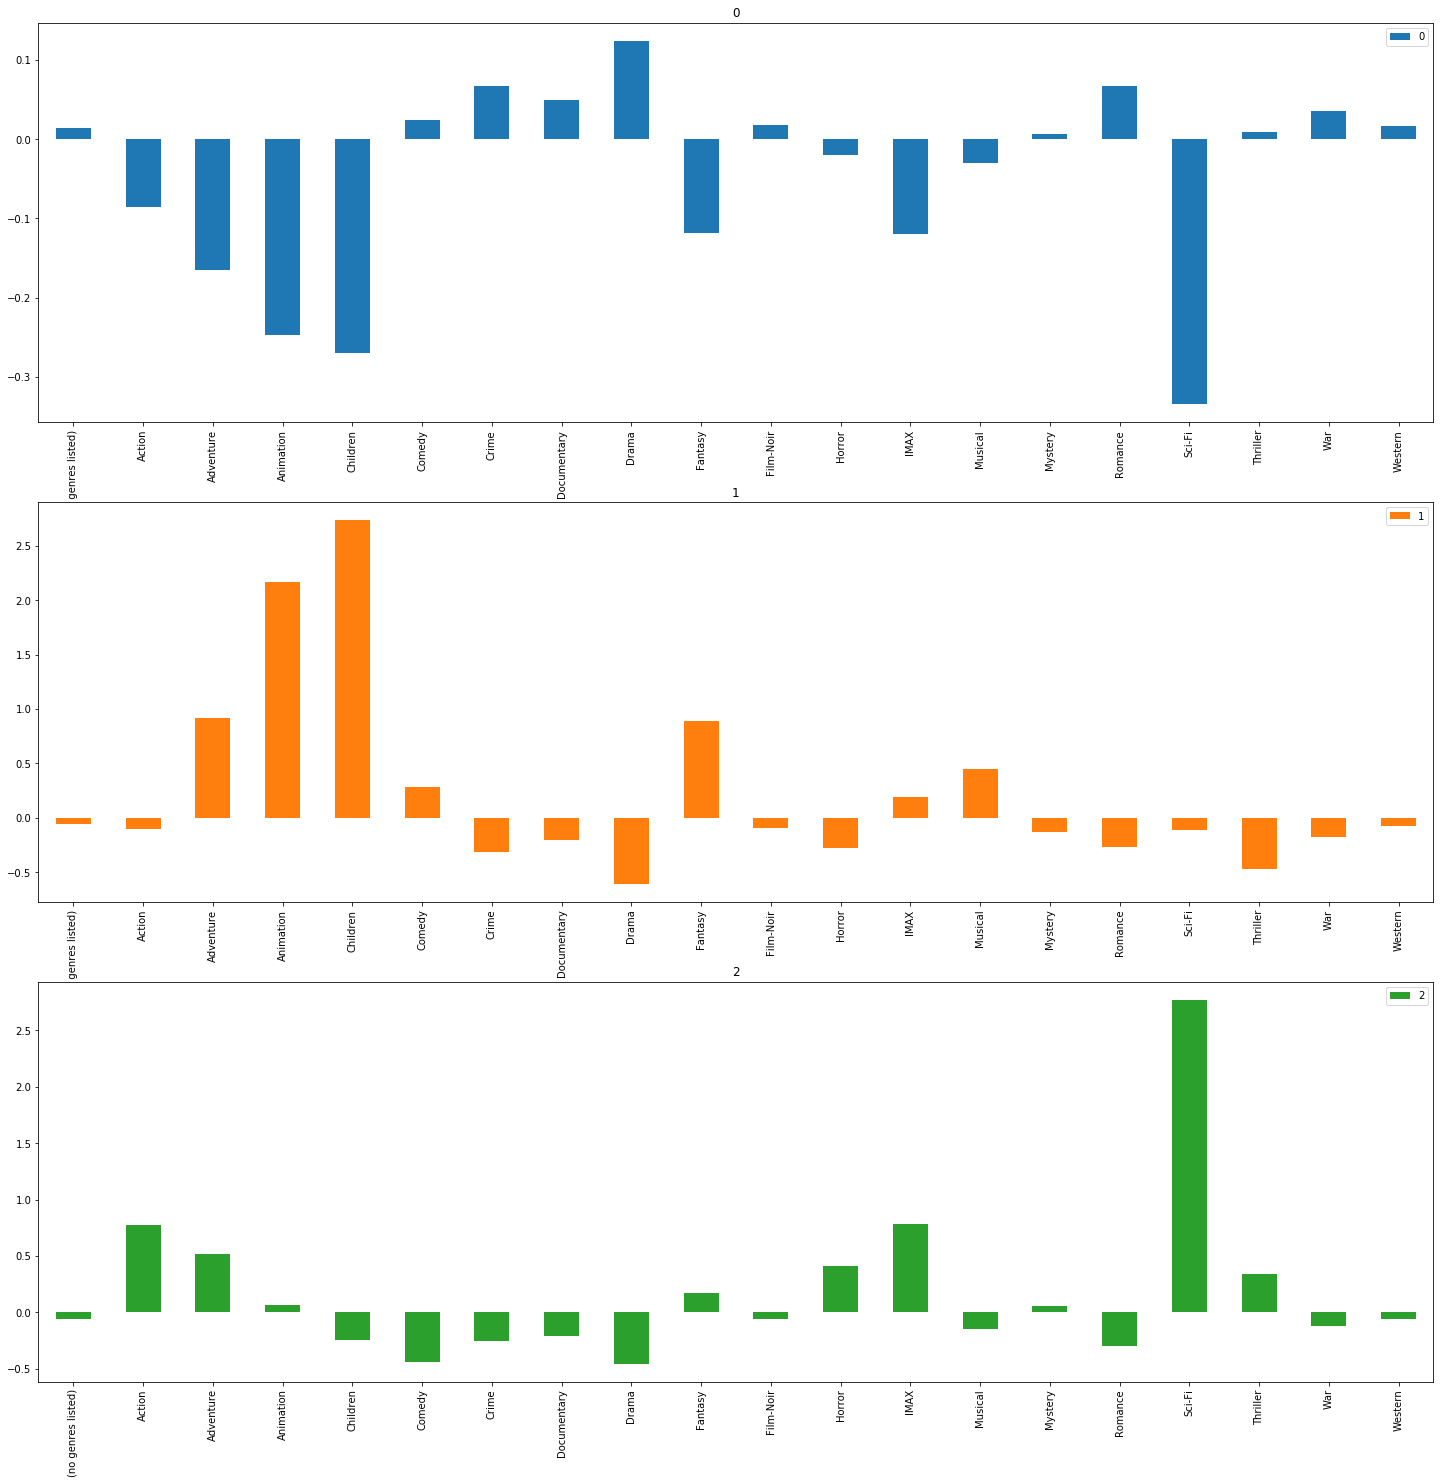

In [28]:
grupos.transpose().plot.bar(subplots=True, figsize=(25, 25), sharex=False)

In [32]:
grupo = 0

filtro = modelo.labels_ == grupo

In [33]:
dados[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
3328,4505,For Keeps (1988),Drama|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6168,44633,"Devil and Daniel Johnston, The (2005)",Documentary,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8083,99910,"Last Stand, The (2013)",Action|Crime|Thriller,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
544,645,Nelly & Monsieur Arnaud (1995),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6524,54116,First Snow (2006),Drama|Thriller,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7046,69140,Sweeney Todd (2006),Crime|Drama|Horror|Thriller,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4136,5951,Morvern Callar (2002),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6118,43289,"Bird People in China, The (Chûgoku no chôjin) ...",Adventure|Comedy|Drama|Fantasy,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7489,82667,I Saw the Devil (Akmareul boatda) (2010),Crime|Thriller,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
441,506,Orlando (1992),Drama|Fantasy|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [36]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 62.060585 ,  29.754368 ],
       [ 32.991543 ,  44.58885  ],
       [-37.59134  ,  27.707928 ],
       ...,
       [ -8.932531 , -16.351557 ],
       [ 54.07583  , -17.21548  ],
       [ 15.47039  ,  15.4282875]], dtype=float32)

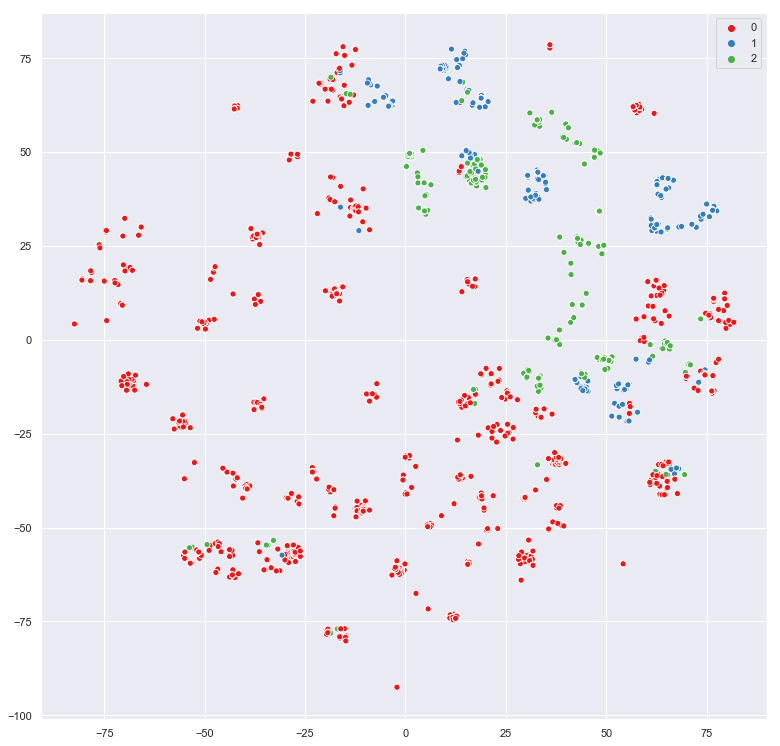

In [41]:
sns.set(rc={'figure.figsize': (13, 13)})
sns.scatterplot(x=visualizacao[:,0], y=visualizacao[:,1],
               hue=modelo.labels_,
               palette=sns.color_palette('Set1', 3))